Для корректной работы ноутбука нужна версия питона 3.8+ и необходимо прописать путь к таблице с данными по коронавирусу

In [77]:
import random 
import statistics 
import numpy as np
import pandas as pd
from scipy.stats import moment, skew, kurtosis
import matplotlib.pyplot as plt

In [78]:
# Кол-во сгенерированных чисел 
t = 500
# Показатель бетта для показательного (экспоненциального)
beta = 2
# Показатель формы для гамма распределения 
shape = 3
# Кол-во степеней свободы для распределения стьюдента
df = 10
# Параметр для распределения Бернулли и для геометрического распределения
p = 0.5
# Показатель лямбда для распределения Пуассона
lam = 5

In [79]:
uniform = np.random.uniform(low=0, high=1, size=t)

normal = np.random.normal(loc=0, scale=1, size=t)

exponential = np.random.exponential(scale=beta, size=t)

gamma = np.random.gamma(shape=shape, scale=1, size=t)

student = np.random.standard_t(df=df, size=t)

bernouli = np.random.binomial(n=1, p=p, size=t)

poisson = np.random.poisson(lam=lam, size=t)

geometric = np.random.geometric(p=p, size=t)

In [80]:
dist = ['Равномерное', 
        'Нормальное', 
        'Показательное', 
        'Гамма', 
        'Стьюдента', 
        'Бернулли', 
        'Пуассона', 
        'Геометрическое']
distributions = [uniform, 
                 normal, 
                 exponential, 
                 gamma, 
                 student, 
                 bernouli, 
                 poisson, 
                 geometric]

In [117]:
def characteristics(data, Print=False):
    
    df_1 = []
    mean = round(data.mean(), 5)
    var = round(np.var(data), 5)
    median = round(np.median(data), 5)
    mode = round(statistics.mode(data), 5)
    skewness = round(skew(data), 5)
    kurt = round(kurtosis(data), 5)
    mom_1 = round(moment(data, moment=1), 5)
    mom_2 = round(moment(data, moment=2), 5)
    
    df_1.append([mean, 
                var, 
                median, 
                mode, 
                skewness, 
                kurt, 
                mom_1, 
                mom_2])
    
    if Print:
        print('Выборочная средняя:', round(data.mean(), 5))
        print('Дисперсия:', round(np.var(data), 5))
        print('Медиана:', round(np.median(data), 5))
        print('Мода:', round(statistics.mode(data), 5))
        print('Ассиметрия (skewness):', round(skew(data), 5))
        print('Эксцесс (kurtosis):', round(kurtosis(data), 5))
        print('Первый центральный момент:', round(moment(data, moment=1), 5))
        print('Второй центральный момент:', round(moment(data, moment=2), 5))
        
    else:
        return df_1[0]
    

In [82]:
df = []
for dist in distributions:
    dist_list = characteristics(dist)
    for value in dist_list:
        df.append(value)  

In [83]:
total = pd.DataFrame(np.array(df).reshape(8, 8))

In [84]:
total.rename(index={0:'Равномерное', 
                      1:'Нормальное', 
                      2:'Показательное', 
                      3:'Гамма', 
                      4:'Стьюдента', 
                      5:'Бернулли', 
                      6:'Пуассона', 
                      7:'Геометрическое'}, 
             columns=({0:'Выборочная средняя', 
                    1:'Дисперсия',
                    2:'Медиана', 
                    3:'Мода', 
                    4:'Ассиметрия (skewness)',
                    5:'Эксцесс (kurtosis)',
                    6:'Первый центральный момент',
                    7:'Второй центральный момент'})).T

,Равномерное,Нормальное,Показательное,Гамма,Стьюдента,Бернулли,Пуассона,Геометрическое
Выборочная средняя,0.49559,-0.01920,1.91394,2.86987,-0.01639,0.48600,4.94000,1.97200
Дисперсия,0.08065,0.99319,3.93137,2.94920,1.23468,0.24980,4.89240,2.04322
Медиана,0.48402,-0.05068,1.23072,2.54185,0.00004,0.00000,5.00000,1.00000
Мода,0.58268,0.47875,5.97808,3.98165,0.09214,0.00000,4.00000,1.00000
Ассиметрия (skewness),0.07699,0.20004,1.84191,1.16665,-0.10374,0.05602,0.35863,1.98030
Эксцесс (kurtosis),-1.16709,0.23714,3.97849,1.82984,0.47243,-1.99686,0.00347,4.59861
Первый центральный момент,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Второй центральный момент,0.08065,0.99319,3.93137,2.94920,1.23468,0.24980,4.89240,2.04322


In [85]:
df_quartiles = []
for dist in distributions:
    quartiles = np.percentile(dist, np.arange(25, 100, 25))
    for value in quartiles:
        df_quartiles.append(value)  

In [86]:
total = pd.DataFrame(np.array(df_quartiles).reshape(8, 3))

In [87]:
total.rename(index={0:'Равномерное', 
                      1:'Нормальное', 
                      2:'Показательное', 
                      3:'Гамма', 
                      4:'Стьюдента', 
                      5:'Бернулли', 
                      6:'Пуассона', 
                      7:'Геометрическое'}, 
             columns=({0:'1-й quartile', 
                    1:'2-й quartile',
                    2:'3-й quartile', 
                    })).T

,Равномерное,Нормальное,Показательное,Гамма,Стьюдента,Бернулли,Пуассона,Геометрическое
1-й quartile,0.244515,-0.666742,0.519290,1.594405,-0.709606,0.0,3.0,1.0
2-й quartile,0.484021,-0.050676,1.230718,2.541848,0.000040,0.0,5.0,1.0
3-й quartile,0.718977,0.579256,2.557619,3.682112,0.682631,1.0,6.0,2.0


In [88]:
df_deciles = []
for dist in distributions:
    deciles = np.percentile(dist, np.arange(10, 100, 10))
    for value in deciles:
        df_deciles.append(value)  

In [89]:
total = pd.DataFrame(np.array(df_deciles).reshape(8, 9))

In [90]:
total.rename(index={0:'Равномерное', 
                      1:'Нормальное', 
                      2:'Показательное', 
                      3:'Гамма', 
                      4:'Стьюдента', 
                      5:'Бернулли', 
                      6:'Пуассона', 
                      7:'Геометрическое'}, 
             columns=({0:'1-й decile', 
                    1:'2-й decile',
                    2:'3-й decile',
                    3:'4-й decile', 
                    4:'5-й decile', 
                    5:'6-й decile', 
                    6:'7-й decile', 
                    7:'8-й decile',
                    8:'9-й decile',
                    })).T

,Равномерное,Нормальное,Показательное,Гамма,Стьюдента,Бернулли,Пуассона,Геометрическое
1-й decile,0.113802,-1.193510,0.179389,1.005549,-1.382633,0.0,2.0,1.0
2-й decile,0.206128,-0.873708,0.411703,1.420498,-0.851875,0.0,3.0,1.0
3-й decile,0.287563,-0.538622,0.610470,1.826057,-0.513676,0.0,4.0,1.0
4-й decile,0.388779,-0.312267,0.892373,2.136328,-0.247774,0.0,4.0,1.0
5-й decile,0.484021,-0.050676,1.230718,2.541848,0.000040,0.0,5.0,1.0
6-й decile,0.588309,0.195516,1.669359,2.873311,0.207844,1.0,5.0,2.0
7-й decile,0.678254,0.454163,2.307191,3.423882,0.521420,1.0,6.0,2.0
8-й decile,0.784979,0.786515,3.107709,4.192855,0.851605,1.0,7.0,3.0
9-й decile,0.895321,1.312043,4.524970,5.245042,1.374193,1.0,8.0,4.0


Ниже приведены примеры сравнения функции распределения генеральной совокупности(красная линия) и выборочной функции распределения(черная линия), а также соответствующие им средние. Видно, что при увеличении количество элементов в выборке ее функция распределения стремится к теоретической, как и среднее значение. Таким образом показана ассимптотическая устойчивость.

Text(-2.0, 0.35, '50 samples')

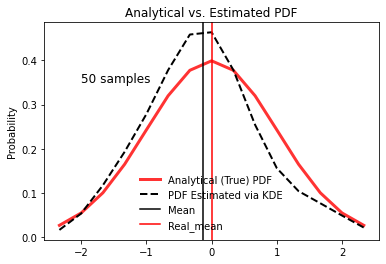

In [91]:
from scipy import stats


dist = stats.norm()
normal = np.random.normal(loc=0, scale=1, size=15)
mean = round(normal.mean(), 5)
real_mean = 0
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=15)
gkde = stats.gaussian_kde(dataset=normal)


fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
plt.axvline(x=mean,label='Mean',c='black')
plt.axvline(x=real_mean,label='Real_mean',c='red')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'50 samples',
        fontsize=12)

Text(-2.0, 0.35, '5000 samples')

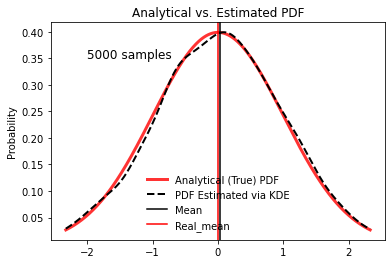

In [92]:
from scipy import stats


dist = stats.norm()
normal = np.random.normal(loc=0, scale=1, size=5000)
mean = round(normal.mean(), 5)
real_mean = 0

x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=5000)
gkde = stats.gaussian_kde(dataset=normal)


fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
plt.axvline(x=mean,label='Mean',c='black')
plt.axvline(x=real_mean,label='Real_mean',c='red')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'5000 samples',
        fontsize=12)

# Асимптотическая нормальность основных выборочных характеристик. Построение серии гистограмм на примере экспоненциального распределения

In [93]:
# Задаем теоретическую функцию плотности экспоненциального распределения¶
def exponential(x):
    return l*math.exp(-l*x)

In [94]:
import math as math
# Cформируем диапазон "иксовых" и "игрековых" значений для построения графика + зафиксируем параметр l
l=0.0125
list_xt = range(600)
list_yt = [exponential(x = i) for i in list_xt]

In [95]:
from scipy.stats import expon
#Сформируем выборку экспоненциального распределения размером 1000 и с среднеквадратическим отклонением 80(посчитано по формуле и однозначно определяется по параметру l
sample = expon.rvs( scale=80, size=1000)


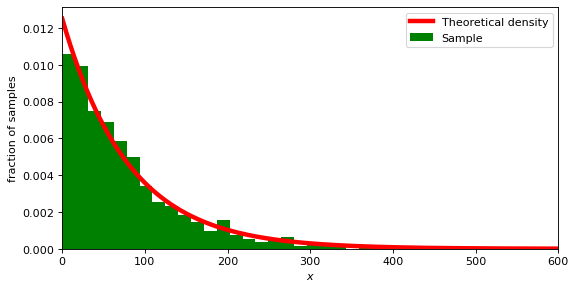

In [96]:
# Строим гистограмму по выборке и график теоретической плотности экспоненциального распределения¶
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(sample, bins = 'auto', density=True,color='g', label='Sample',histtype='stepfilled')


axes.set_xlim([0,600])
plt.plot(list_xt, list_yt, label='Theoretical density', color='r', lw=4)
plt.xlabel('$x$')
plt.ylabel('fraction of samples')
plt.legend()
plt.show()

In [97]:
# Строим распределение выборочного среднего при объёме выборки 5¶
n=5
samplefive=[]
for i in range(1000):
    summa = 0
    for j in range(n):
        summa += expon.rvs(scale=80)
    samplefive.append(summa/n)

In [98]:
# Вычисляем математическое ожидание(mu) и среднеквадратическое отклонение(sigma) апроксимирующего нормального распределения при объеме выборки 5
mu=1/l
sigma=math.sqrt(1/(l**2))/math.sqrt(n)
print(mu)
print(sigma)

80.0
35.77708763999664


In [99]:
from scipy.stats import norm
# Получаем функцию плотности вероятности апроксимирующего нормального распределения при объеме выборки 5
norm_pdf=norm.pdf(list_xt,mu, sigma)

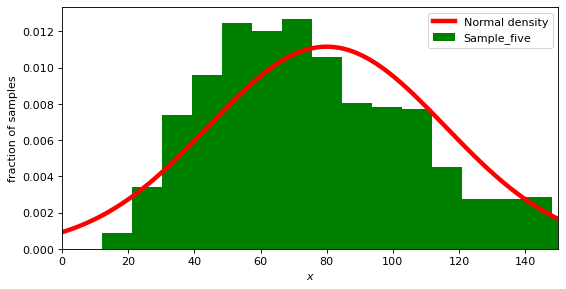

In [100]:
# Строим гистограмму по выборке и график теоретической плотности апроксимирующего нормального распределения(объем выборки равен 5)¶
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(samplefive, bins = 'auto', density=True,color='g', label='Sample_five',histtype='stepfilled')
axes.set_xlim([0,150])
plt.plot(list_xt, norm_pdf, label='Normal density', color='r', lw=4)
plt.xlabel('$x$')
plt.ylabel('fraction of samples')
plt.legend()
plt.show()

In [101]:
# Строим распределение выборочного среднего при объёме выборки 50
n=50
samplefifty=[]
for i in range(1000):
    summa = 0
    for j in range(n):
        summa += expon.rvs(scale=80)
    samplefifty.append(summa/n)

In [102]:
# Вычисляем математическое ожидание(mu) и среднеквадратическое отклонение(sigma) апроксимирующего нормального распределения при объеме выборки 50
mu=1/l
sigma=math.sqrt(1/(l**2))/math.sqrt(n)
print(mu)
print(sigma)

80.0
11.31370849898476


In [103]:
# Получаем функцию плотности вероятности апроксимирующего нормального распределения при объеме выборки 50
norm_pdf=norm.pdf(list_xt,mu, sigma)

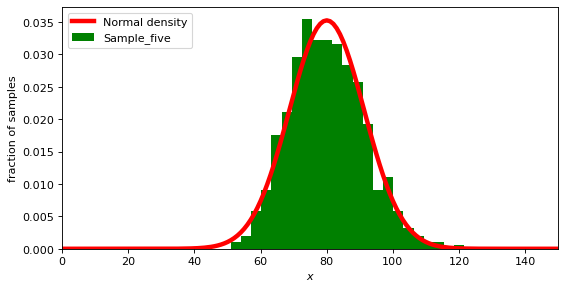

In [104]:
#Строим гистограмму по выборке и график теоретической плотности апроксимирующего нормального распределения(объем выборки равен 50)

fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(samplefifty, bins = 'auto', density=True,color='g', label='Sample_five',histtype='stepfilled')
axes.set_xlim([0,150])
plt.plot(list_xt, norm_pdf, label='Normal density', color='r', lw=4)
plt.xlabel('$x$')
plt.ylabel('fraction of samples')
plt.legend()
plt.show()

In [105]:
# Строим распределение выборочного среднего при объёме выборки 200¶
n=200
sampletwohundred=[]
for i in range(1000):
    summa = 0
    for j in range(n):
        summa += expon.rvs(scale=80)
    sampletwohundred.append(summa/n)

In [106]:
# Вычисляем математическое ожидание(mu) и среднеквадратическое отклонение(sigma) апроксимирующего нормального распределения при объеме выборки 200¶
mu=1/l
sigma=math.sqrt(1/(l**2))/math.sqrt(n)
print(mu)
print(sigma)

80.0
5.65685424949238


In [107]:
# Получаем функцию плотности вероятности апроксимирующего нормального распределения при объеме выборки 200
norm_pdf=norm.pdf(list_xt,mu, sigma)

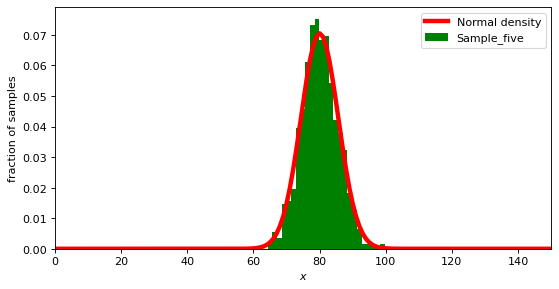

In [108]:
# Строим гистограмму по выборке и график теоретической плотности апроксимирующего нормального распределения(объем выборки равен 200)
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(sampletwohundred, bins = 'auto', density=True,color='g', label='Sample_five',histtype='stepfilled')
axes.set_xlim([0,150])
plt.plot(list_xt, norm_pdf, label='Normal density', color='r', lw=4)
plt.xlabel('$x$')
plt.ylabel('fraction of samples')
plt.legend()
plt.show()

С каждым увеличением объема выборки, выборочное среднее $\mu $ приближается к теоретическому (исходному) математическому ожиданию $\mu=80$. Глядя на графики видно, что при увеличении объемов выборок, распределение все больше становится похожим на нормальное. С ростом n точность аппроксимации распределения выборочных средних нормальным распределением растет

Далее найдем 95% доверительынй интервал для среднего значения экспоненциального распределения с размером выборки 200

In [109]:
from statsmodels.stats.weightstats import _tconfint_generic
sampletwohundred_mean=pd.DataFrame(sampletwohundred).mean()
sampletwohundred_std=pd.DataFrame(sampletwohundred).std(ddof=1)/math.sqrt(len(sampletwohundred))
print("95%% confidence interval", _tconfint_generic(sampletwohundred_mean[0], sampletwohundred_std[0],
                                                                       len(sampletwohundred) - 1,
                                                                       0.05, 'two-sided'))

95%% confidence interval (79.67644530990859, 80.36113006625212)


In [110]:
pd.DataFrame(sampletwohundred).mean()

0    80.018788
dtype: float64

Как мы видим выборочное среднее уже для выборки размером 200 с хорошей точностью соответствует среднему генеральной совокупности, которое посчитано выше и равняется 80

# Данные по короновирусу

In [181]:
df=pd.read_excel('C:/Users/egoro/Downloads/Tablitsa_2021-09-28_03-24.xlsx',index_col=0)

In [184]:
df.index =pd.to_datetime(df.index)
df.sort_values(by=['Регион','Дата'],inplace=True,ascending=[1,1])

In [185]:
df

,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Дата,,,,,,,
2020-01-04,Адыгея,4,0,0,0,0,0
2020-01-05,Адыгея,165,48,3,0,2,0
2020-01-06,Адыгея,874,394,9,0,20,23
2020-01-07,Адыгея,1935,1340,14,0,37,38
2020-01-08,Адыгея,2775,2130,20,0,28,18
...,...,...,...,...,...,...,...
2021-12-05,Ярославская обл.,39582,37804,557,3,79,79
2021-12-06,Ярославская обл.,42007,39920,642,2,79,70
2021-12-07,Ярославская обл.,45929,41813,763,6,200,83


In [186]:
df.groupby(by='Регион').describe()

Заражений                                            \
                       count          mean           std  min      25%   
Регион                                                                   
Адыгея                 565.0   8898.092035   6329.899707  0.0   2747.0   
Алтай                  558.0  10312.188172   7750.728609  0.0   1647.5   
Алтайский край         565.0  30613.971681  23356.185862  0.0   9109.0   
Амурская обл.          565.0  13567.470796  10956.633175  0.0   2752.0   
Архангельская обл.     565.0  37040.313274  28725.693407  0.0   8710.0   
...                      ...           ...           ...  ...      ...   
Чечня                  565.0   7657.424779   6334.637375  0.0   2060.0   
Чувашия                565.0  15412.368142  10393.816983  0.0   6734.0   
Чукотский АО           560.0    525.380357    441.600046  0.0    154.0   
Ямало-Ненецкий АО      565.0  25185.529204  16168.734746  0.0  11016.0   
Ярославская обл.       565.0  23238.054867  18641.470637  0.0   6034.0   

                                               Выздоровлений                \
                        50%       75%      max         count          mean   
Регион                                                                       
Адыгея               9942.0  14499.00  19502.0         565.0   7949.913274   
Алтай               13211.5  16843.25  21463.0         558.0   9600.197133   
Алтайский край      30333.0  50272.00  76919.0         565.0  26212.973451   
Амурская обл.       14201.0  22418.00  35134.0         565.0  12170.368142   
Архангельская обл.  38786.0  62442.00  88611.0         565.0  32721.405310   
...                     ...       ...      ...           ...           ...   
Чечня                7016.0  12084.00  22412.0         565.0   6624.007080   
Чувашия             14954.0  24681.00  33715.0         565.0  13599.569912   
Чукотский АО          495.0    750.00   1798.0         560.0    451.942857   
Ямало-Ненецкий АО   29977.0  38700.00  50165.0         565.0  22554.288496   
Ярославская обл.    20017.0  39349.00  60909.0         565.0  21166.129204   

                    ... Заражений за день        Выздоровлений за день  \
                    ...               75%    max                 count   
Регион              ...                                                  
Адыгея              ...              54.0  105.0                 565.0   
Алтай               ...              52.0  219.0                 558.0   
Алтайский край      ...             217.0  305.0                 565.0   
Амурская обл.       ...             119.0  171.0                 565.0   
Архангельская обл.  ...             242.0  407.0                 565.0   
...                 ...               ...    ...                   ...   
Чечня               ...              60.0  187.0                 565.0   
Чувашия             ...              77.0  133.0                 565.0   
Чукотский АО        ...               4.0   31.0                 560.0   
Ямало-Ненецкий АО   ...             132.0  288.0                 565.0   
Ярославская обл.    ...             185.0  208.0                 565.0   

                                                                            
                          mean         std  min   25%    50%    75%    max  
Регион                                                                      
Адыгея               30.575221   24.297508  0.0  11.0   25.0   45.0  134.0  
Алтай                36.517921   49.930352  0.0   6.0   20.0   48.0  382.0  
Алтайский край      104.769912   86.429409  0.0  39.0   90.0  150.0  544.0  
Амурская обл.        51.088496   51.118476  0.0  18.0   39.0   68.0  381.0  
Архангельская обл.  144.267257  132.580450  0.0  42.0  113.0  201.0  631.0  
...                        ...         ...  ...   ...    ...    ...    ...  
Чечня                36.730973   66.227353  0.0   5.0   13.0   32.0  721.0  
Чувашия              53.980531   42.751566  0.0  27.0   47.0   69.0  332.0  
Чукот

In [187]:
df.groupby(by='Регион').skew()

,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Регион,,,,,,
Адыгея,-0.067487,-0.008037,0.851949,1.245019,0.734743,0.921073
Алтай,-0.182583,-0.136362,0.440517,2.236484,1.690283,3.110122
Алтайский край,0.188209,-0.029926,0.734263,0.745582,0.135103,1.250604
Амурская обл.,0.166570,0.066901,0.553011,2.531867,0.566984,2.277953
Архангельская обл.,0.080613,0.186043,0.279720,2.441710,0.553687,1.162916
...,...,...,...,...,...,...
Чечня,0.502442,0.513750,2.008151,3.101808,1.361152,4.115571
Чувашия,0.071426,0.066091,0.511082,0.612292,0.299622,2.135479
Чукотский АО,0.889102,0.470075,0.866251,7.226513,2.021021,2.431351


In [188]:
df.groupby(by='Регион').median()

,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Регион,,,,,,
Адыгея,9942.0,7893.0,77.0,0.0,27.0,25.0
Алтай,13211.5,12567.0,81.5,0.0,26.0,20.0
Алтайский край,30333.0,27784.0,744.0,6.0,115.0,90.0
Амурская обл.,14201.0,12653.0,105.0,0.0,38.0,39.0
Архангельская обл.,38786.0,29547.0,394.0,0.0,119.0,113.0
...,...,...,...,...,...,...
Чечня,7016.0,3281.0,86.0,0.0,14.0,13.0
Чувашия,14954.0,13329.0,410.0,3.0,56.0,47.0
Чукотский АО,495.0,429.5,4.0,0.0,1.0,0.0


Получим 95% доверительный интервал для среднего значения числа заражений в Адыгее.

In [189]:
example = df[df['Регион'] == 'Адыгея']

In [190]:
example_mean=pd.DataFrame(example).mean()
example_std=pd.DataFrame(example).std(ddof=1)/math.sqrt(len(example))
print("95%% confidence interval", _tconfint_generic(example_mean[0], example_std[0],
                                                                       len(example) - 1,
                                                                       0.05, 'two-sided'))

95%% confidence interval (8375.029427985482, 9421.154642810976)


In [191]:
example.sort_values(by=['Дата'],ascending=[1])

,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Дата,,,,,,,
2020-01-04,Адыгея,4,0,0,0,0,0
2020-01-05,Адыгея,165,48,3,0,2,0
2020-01-06,Адыгея,874,394,9,0,20,23
2020-01-07,Адыгея,1935,1340,14,0,37,38
2020-01-08,Адыгея,2775,2130,20,0,28,18
...,...,...,...,...,...,...,...
2021-12-05,Адыгея,14522,13979,185,0,7,5
2021-12-06,Адыгея,14773,14257,214,1,9,8
2021-12-07,Адыгея,15419,14608,267,0,37,15


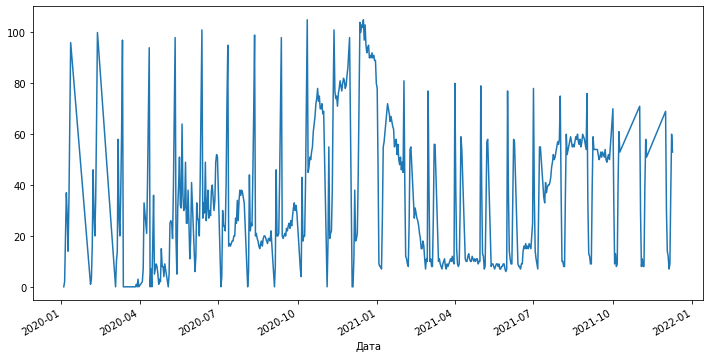

In [197]:
example['Заражений за день'].plot(figsize=(12,6))


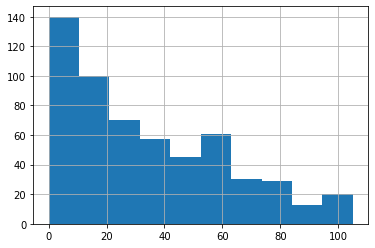

In [198]:
example['Заражений за день'].hist()

Видно, что распределение заражений за день не являетя нормальным.Проведем проверку на стационарность с помощью теста Дики-Фуллера.

In [201]:
import statsmodels.api as sm
test = sm.tsa.adfuller(example['Заражений за день'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.8965209072328397
p-value:  0.0020606010292067304
Critical values:  {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}
единичных корней нет, ряд стационарен
